In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
%matplotlib inline

In [2]:
fname1 = "Yule"
fname2 = "yule"

In [3]:
data = xr.open_mfdataset(f'Reef-Data/{fname1}_reef.nc')
data


<xarray.Dataset>
Dimensions:  (time: 1122)
Coordinates:
  * time     (time) datetime64[ns] 2016-11-01 2016-11-02 ... 2019-11-28
Data variables:
    temp     (time) float32 dask.array<chunksize=(1122,), meta=np.ndarray>
    Gnet     (time) float32 dask.array<chunksize=(1122,), meta=np.ndarray>
    PH       (time) float32 dask.array<chunksize=(1122,), meta=np.ndarray>
Attributes:
    Run_ID:       2.0
    hasVocab:     1
    title:        GBR4 BGC (Spectral) Transport
    paramhead:    GBR 4km resolution grid
    paramfile:    in.prm
    ems_version:  v1.0 rev(5997)
    Conventions:  CF-1.0

In [4]:
data = data.to_dataframe()

data

,temp,Gnet,PH
time,,,
2016-11-01,26.765003,0.009197,8.072104
2016-11-02,26.754982,0.005959,8.072297
2016-11-03,26.815987,0.010060,8.071436
2016-11-04,26.878759,0.001785,8.070299
2016-11-05,27.082066,0.011003,8.067262
...,...,...,...
2019-11-24,26.312889,0.010990,8.119781
2019-11-25,26.168882,0.010722,8.121310
2019-11-26,26.361717,0.003607,8.116940


In [5]:
data.describe()

,temp,Gnet,PH
count,1122.000000,1122.000000,1122.000000
mean,26.840981,0.007787,8.075549
std,1.623944,0.005407,0.025323
min,24.250578,-0.008793,8.007412
25%,25.166941,0.006889,8.056894
50%,26.799891,0.008917,8.076257
75%,28.189299,0.009721,8.093048
max,30.665741,0.027558,8.138801


In [6]:
y = data['Gnet']
x = data.drop('Gnet', axis=1)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0)

In [8]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 1000, random_state = 42)
regressor.fit(X_train, y_train)


RandomForestRegressor(n_estimators=1000, random_state=42)

In [9]:
X_test

,temp,PH
time,,
2018-12-17,28.694653,8.035817
2019-05-11,27.209330,8.073144
2017-12-01,27.628977,8.069001
2019-08-14,24.360146,8.117963
2018-03-27,28.432871,8.044954
...,...,...
2018-03-03,29.663464,8.036603
2018-02-02,28.991129,8.047394
2019-07-01,25.540695,8.092996


In [10]:
y_pred = regressor.predict(X_test)


In [11]:
y_pred

array([ 0.00465316,  0.0087812 ,  0.0067744 ,  0.01002962,  0.00594272,
        0.00859055,  0.0072524 ,  0.01286992,  0.00982616,  0.00661849,
        0.00737494,  0.00343523,  0.0037579 ,  0.01079987,  0.00781741,
        0.00962904,  0.00847737,  0.00664845,  0.00782976,  0.00978685,
        0.00929917,  0.00822818,  0.00968821,  0.00755581,  0.00409596,
        0.00915213,  0.00861582,  0.0126363 ,  0.00364189,  0.0036221 ,
        0.00844888,  0.00753968,  0.0060978 ,  0.002546  ,  0.00858682,
        0.00904365,  0.00467977,  0.00980332,  0.01011559,  0.01009334,
        0.00799592,  0.00483524,  0.00944797,  0.00980075,  0.00838672,
        0.00887703,  0.00784388,  0.0009455 ,  0.00394433,  0.00845301,
        0.00780886,  0.0097418 ,  0.00877146,  0.01112397,  0.00882503,
        0.00908026,  0.00729994,  0.0058375 ,  0.00975679,  0.00854117,
        0.0101244 ,  0.01022963,  0.00779087,  0.00979155,  0.00691051,
        0.011875  ,  0.0094412 ,  0.00778504,  0.00882947,  0.00

In [12]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

,Actual,Predicted
time,,
2018-12-17,0.018512,0.004653
2019-05-11,0.008805,0.008781
2017-12-01,0.009155,0.006774
2019-08-14,0.009841,0.010030
2018-03-27,-0.000869,0.005943
...,...,...
2018-03-03,0.008032,0.005021
2018-02-02,0.008319,0.004147
2019-07-01,0.009383,0.009242


In [13]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.0033899267512081045
Mean Squared Error: 2.8865947255267652e-05
Root Mean Squared Error: 0.005372703905415564


In [14]:
# Calculate the absolute errors
errors = abs(y_pred - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 0.0 degrees.
Accuracy: 159.64 %.


/usr/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


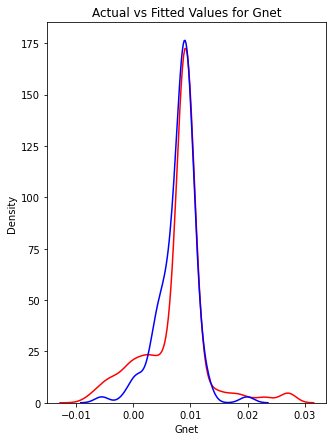

In [15]:
import seaborn as sns
plt.figure(figsize=(5, 7))


ax = sns.distplot(y, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values for Gnet')


plt.show()
plt.close()

In [16]:
# import pydot
# # Pull out one tree from the forest
# Tree = regressor.estimators_[5]
# # Export the image to a dot file
# from sklearn import tree
# plt.figure(figsize=(25,15))
# tree.plot_tree(Tree,filled=True, 
#               rounded=True, 
#               fontsize=14);

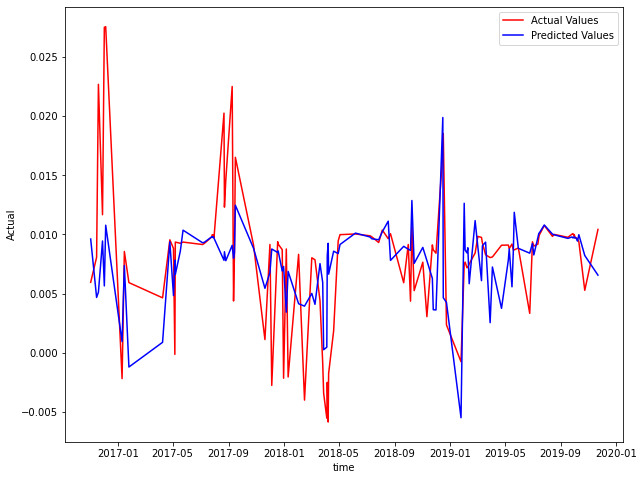

In [17]:
plt.figure(figsize=(10, 8))

ax = sns.lineplot(data= df,x = 'time', y= 'Actual' , color="r", label="Actual Values")
sns.lineplot(data= df, x = 'time', y= 'Predicted', color="b", label="Predicted Values" , ax=ax)

plt.show()
plt.close()

In [18]:
ds = xr.open_dataset(f'future_data/{fname2}_forecast.nc')
ds

<xarray.Dataset>
Dimensions:  (time: 502)
Coordinates:
  * time     (time) datetime64[ns] 2019-04-01 2019-05-01 ... 2061-01-01
Data variables:
    temp     (time) float64 ...
    ph       (time) float64 ...

In [19]:
#create new pandas data frame
X_forecast = ds.to_dataframe()
X_forecast.rename(columns={'ph': 'PH'}, inplace=True)
X_forecast


,temp,PH
time,,
2019-04-01,26.544879,8.075426
2019-05-01,25.653476,8.086429
2019-06-01,24.733007,8.094708
2019-07-01,24.534554,8.094244
2019-08-01,24.668165,8.091585
...,...,...
2060-09-01,22.956544,8.118634
2060-10-01,24.179571,8.104588
2060-11-01,25.573933,8.085811


In [20]:
date_rng = pd.date_range(start='2019-04-01', end='2061-01-01', freq='MS')
date_rng

DatetimeIndex(['2019-04-01', '2019-05-01', '2019-06-01', '2019-07-01',
               '2019-08-01', '2019-09-01', '2019-10-01', '2019-11-01',
               '2019-12-01', '2020-01-01',
               ...
               '2060-04-01', '2060-05-01', '2060-06-01', '2060-07-01',
               '2060-08-01', '2060-09-01', '2060-10-01', '2060-11-01',
               '2060-12-01', '2061-01-01'],
              dtype='datetime64[ns]', length=502, freq='MS')

In [21]:
y_forecast = regressor.predict(X_forecast)
Gnet_forecast = pd.DataFrame({'time':date_rng,'Predicted_Gnet':y_forecast})
Gnet_forecast.index = pd.to_datetime(Gnet_forecast['time'])
Gnet_forecast.drop(['time'], axis=1, inplace=True)
Gnet_forecast

,Predicted_Gnet
time,
2019-04-01,0.006716
2019-05-01,0.008782
2019-06-01,0.008907
2019-07-01,0.009349
2019-08-01,0.005893
...,...
2060-09-01,0.010025
2060-10-01,0.009667
2060-11-01,0.008407


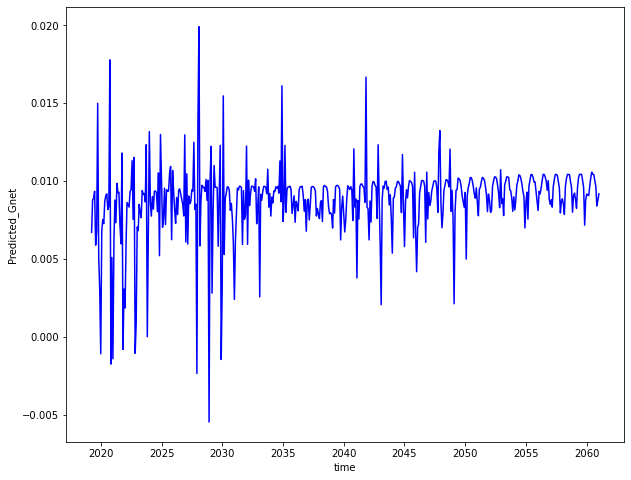

In [22]:
plt.figure(figsize=(10, 8))

sns.lineplot(data= Gnet_forecast, x='time', y='Predicted_Gnet', color="b")

plt.show()


/usr/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Forecasted net calcification')

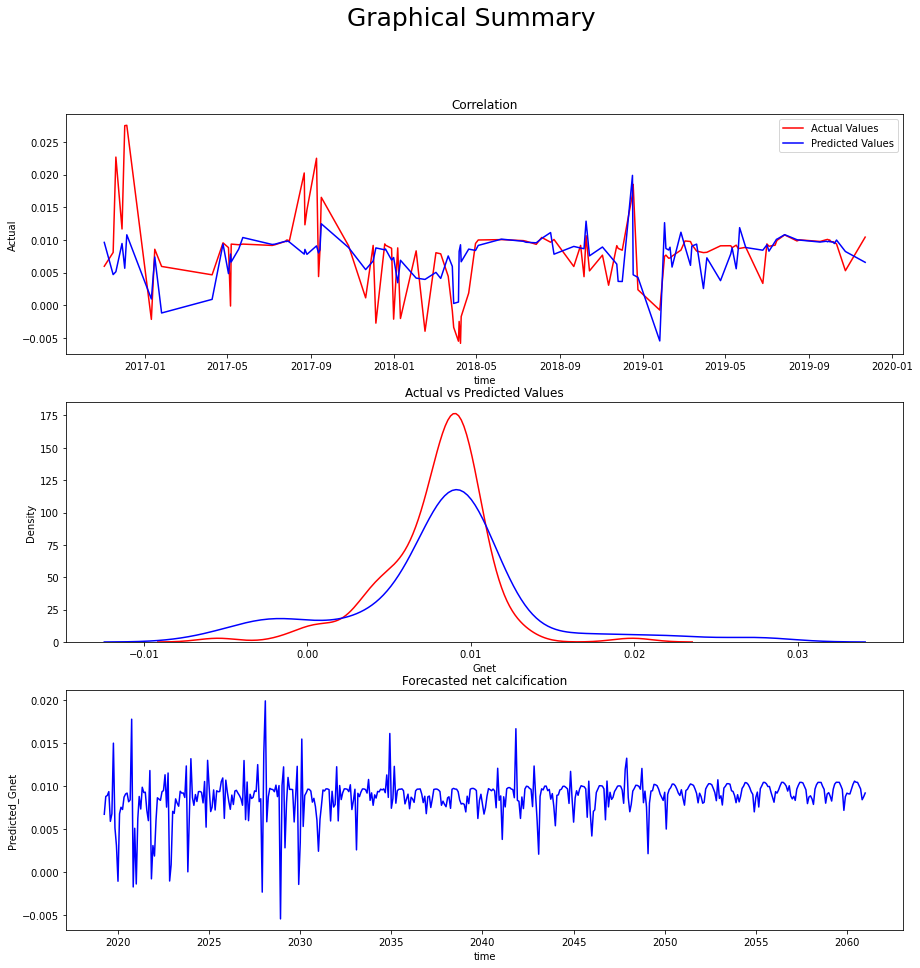

In [23]:
fig, axes = plt.subplots(3,1,figsize=(15,15))

sns.lineplot(data= df,x = 'time', y= 'Actual' , color="r", label="Actual Values", ax= axes[0])
sns.lineplot(data= df, x = 'time', y= 'Predicted', color="b", label="Predicted Values", ax= axes[0])

sns.distplot(y_pred, hist = False, color = 'r', label = 'Predicted Values', ax= axes[1])
sns.distplot(y_test, hist = False, color = 'b', label = 'Actual Values', ax= axes[1])

sns.lineplot(data= Gnet_forecast, x='time', y='Predicted_Gnet', color="b", ax= axes[2])

plt.suptitle("Graphical Summary", fontsize= 25)
axes[0].set_title('Correlation')
axes[1].set_title('Actual vs Predicted Values')
axes[2].set_title('Forecasted net calcification')

    